In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.__version__

'2.2.3'

# Часть 3 - Моделирование данных

## Содержание

### 9 Моделирование данных - предварительная обработка
- Введение в моделирование данных
- Изучение зависимых и независимых переменных
- Понимание масштабирования и нормализации данных
- Задание 9.1 - Разбиение, масштабирование и моделирование данных
- Резюме

### 10 Моделирование данных - основы моделирования
- Введение в моделирование данных
- Изучение основ моделирования
- Прогнозирование будущих значений временных рядов
- Задание 10.1 - Нормализация и сглаживание данных
- Резюме

### 11 Моделирование данных - Регрессионное моделирование
- Введение в регрессионное моделирование
- Изучение регрессионного моделирования
- Диагностика модели
- Задание 11.1 - Множественная регрессия с нелинейными моделями
- Резюме

## 9 Моделирование данных - предварительная обработка

### Введение в моделирование данных

In [3]:
df = pd.read_csv('../../data/part3/chapter9/metal_alloy.csv')
df

,metal_1,metal_2,alloy_hardness
0,0.958000,0.140659,1.254157
1,0.920147,0.107089,0.956846
2,0.590646,0.483316,1.952517
3,0.787427,0.239446,1.636522
4,0.223974,0.817454,2.367797
...,...,...,...
2853,0.548989,0.536676,1.964153
2854,0.506765,0.520222,2.121921
2855,0.519789,0.553591,1.802263
2856,0.499100,0.539305,1.687534


In [4]:
df.describe()

,metal_1,metal_2,alloy_hardness
count,2858.000000,2858.000000,2858.000000
mean,0.571507,0.511146,1.863682
std,0.092015,0.094267,0.315855
min,0.148309,0.097655,0.558923
25%,0.520719,0.461251,1.661194
50%,0.568061,0.513548,1.864663
75%,0.618368,0.565723,2.076587
max,1.021651,0.922628,3.363747


<Axes: >

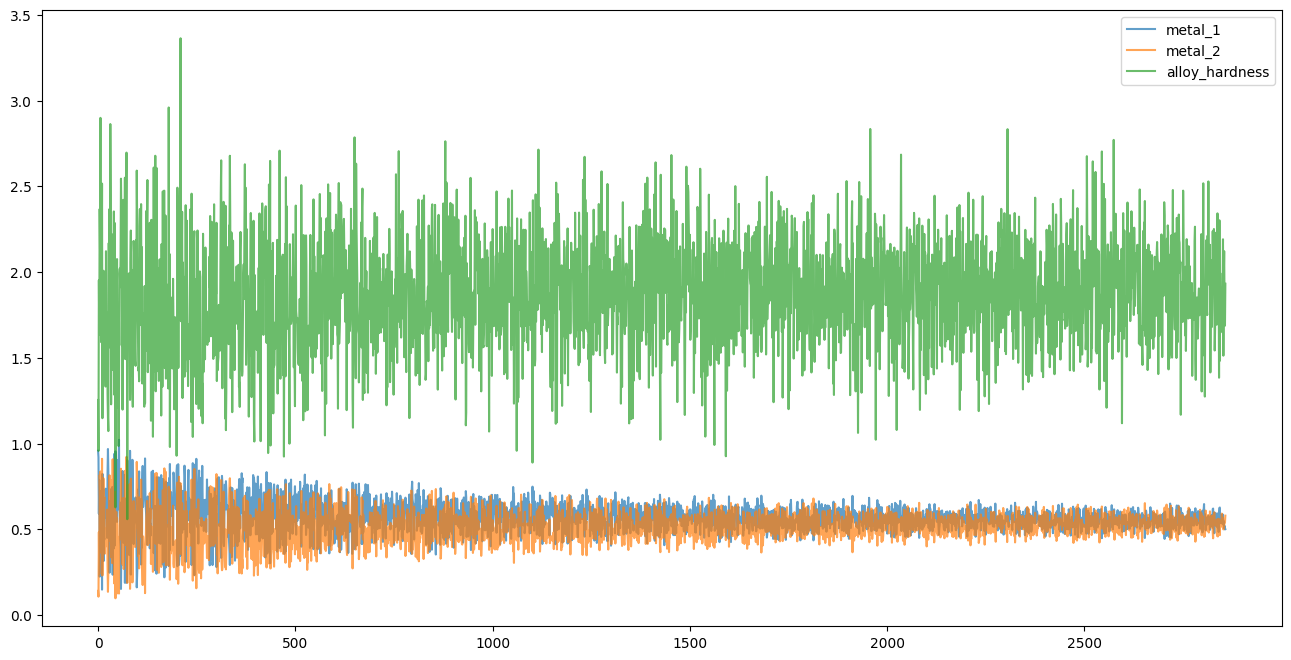

In [11]:
df.plot(figsize=(16, 8), alpha=0.7)

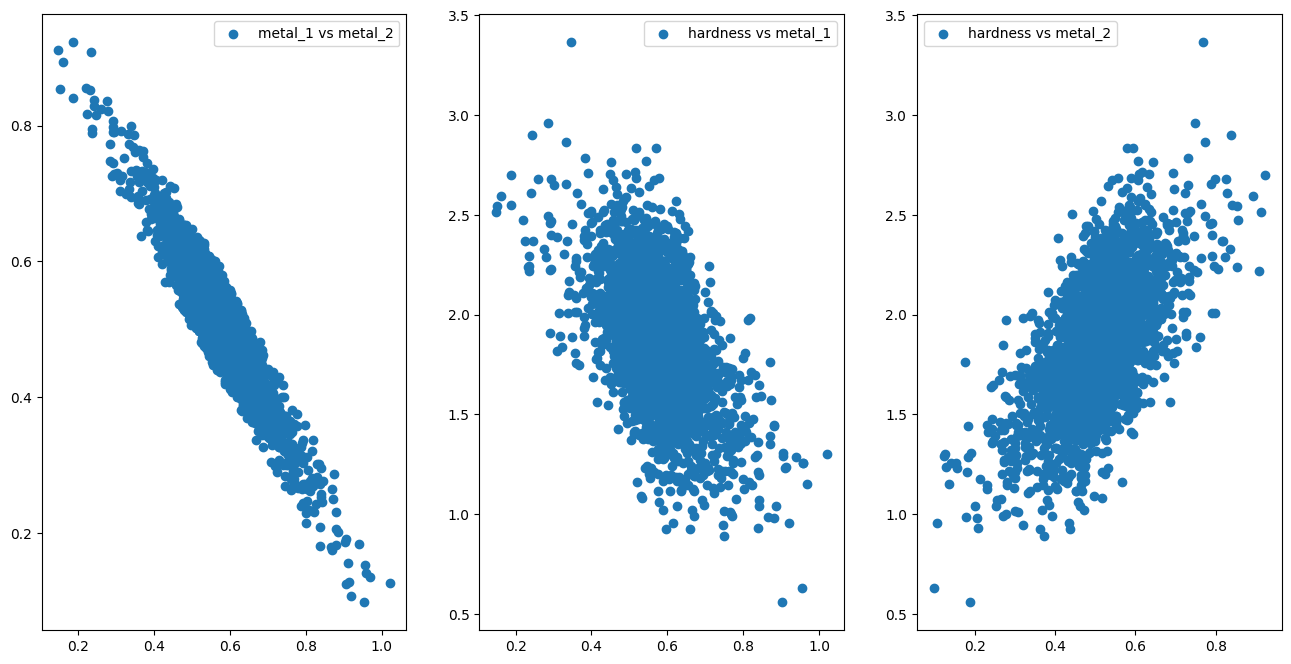

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

axes[0].scatter(
    df['metal_1'],
    df['metal_2'],
    label = 'metal_1 vs metal_2',
)
axes[0].legend()

axes[1].scatter(
    df['metal_1'],
    df['alloy_hardness'],
    label = 'hardness vs metal_1',
)
axes[1].legend()

axes[2].scatter(
    df['metal_2'],
    df['alloy_hardness'],
    label = 'hardness vs metal_2',
)
axes[2].legend()

plt.show()

In [16]:
correlation = df['metal_1'].corr(df['metal_2'])
correlation

np.float64(-0.9335045017430931)

#### Статистическая модель

In [18]:
import statsmodels.api as sm

X = sm.add_constant(df.loc[:, ['metal_1', 'metal_2']])
lin_model = sm.OLS(df['alloy_hardness'], X)
my_model = lin_model.fit()

print(my_model.summary())
print(my_model.params)

                            OLS Regression Results                            
Dep. Variable:         alloy_hardness   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     929.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.23e-311
Time:                        11:44:01   Log-Likelihood:                -44.409
No. Observations:                2858   AIC:                             94.82
Df Residuals:                    2855   BIC:                             112.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3434      0.147     -2.339      0.0

y = -0.3434 + 1.1086 * metal_1 + 3.0783 * metal_2

In [32]:
metal_1 = 0.4
metal_2 = 0.8

In [33]:
y = -0.3434 + 1.1086 * metal_1 + 3.0783 * metal_2
y

2.5626800000000003

#### Генерация случайных данных

In [38]:
np.random.seed(55)

multi_coll_data = pd.DataFrame({'x1': range(1000)})

for i in range(9):
    multi_coll_data['x' + str(i + 2)] = np.add(list(range(1000)), np.random.uniform(-50, 50, 1000))
    

for i in range(0, 9, 2):
    multi_coll_data['x' + str(i + 2)] = np.add(multi_coll_data['x' + str(i + 2)], 10 * np.random.uniform(-100, 100, 1000))
    

np.random.normal(-100, 100, 1000)
multi_coll_data['y'] = range(1000)

In [39]:
multi_coll_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0,-579.086269,-21.352788,-127.136661,-44.242123,-82.658981,23.043307,390.611985,32.379823,855.245946,0
1,1,352.288310,42.355440,975.854620,-40.891040,-333.674322,-0.717224,-201.265706,-12.522834,-494.399577,1
2,2,460.677297,0.467680,-691.299930,-35.042297,293.510696,28.223616,516.710800,50.632223,-638.390063,2
3,3,-746.577859,-40.318827,357.783231,-19.421430,704.798484,30.728551,-3.113581,-46.230721,-741.969272,3
4,4,-692.088919,17.724324,-953.864448,22.520236,-707.770416,1.901699,469.345834,0.762547,807.144628,4
...,...,...,...,...,...,...,...,...,...,...,...
995,995,1861.276790,1013.560643,1087.982225,1023.738733,980.756591,949.343224,760.496127,945.706977,1281.693691,995
996,996,1387.077341,1019.701253,1332.705610,1027.438780,1941.506839,989.956534,23.911601,982.981131,1064.590884,996
997,997,1171.140963,991.916710,1357.697060,1046.720219,1828.655199,949.730361,284.580213,985.958475,1691.377234,997
998,998,214.549942,995.550479,1603.694783,1000.771433,316.011067,1003.760028,1196.998620,1047.695951,173.344662,998


In [42]:
multi_coll_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,488.511416,501.155173,528.081494,498.461929,514.890713,498.892323,461.384521,499.442777,506.567117,499.500000
std,288.819436,652.089943,290.159283,638.220208,289.768393,653.657528,289.952784,643.473473,290.528559,657.127397,288.819436
min,0.000000,-930.320259,-40.318827,-1006.390645,-44.242123,-970.074483,-43.303588,-888.712598,-46.230721,-959.722293,0.000000
25%,249.750000,-12.600960,253.698322,41.185114,254.758918,12.409287,250.807414,-31.118217,246.944195,-2.936601,249.750000
50%,499.500000,481.873691,496.696353,545.518091,502.306019,534.582109,506.972797,455.911348,499.169859,508.460055,499.500000
75%,749.250000,991.083324,757.958709,991.522760,752.583341,1027.528486,746.531261,962.945517,746.464865,1028.102798,749.250000
max,999.000000,1978.357550,1021.453170,1986.100582,1046.720219,1941.506839,1039.565397,1984.087235,1047.695951,1980.877205,999.000000


<Axes: >

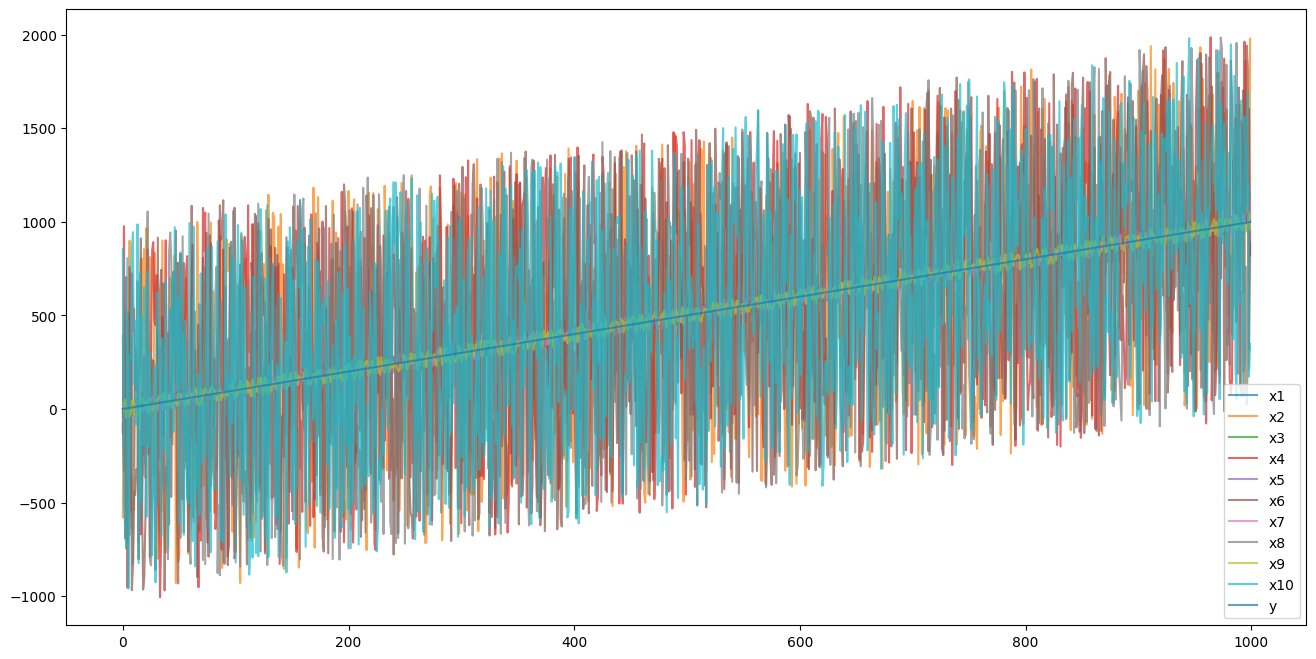

In [41]:
multi_coll_data.plot(figsize=(16, 8), alpha=0.7)

<Axes: >

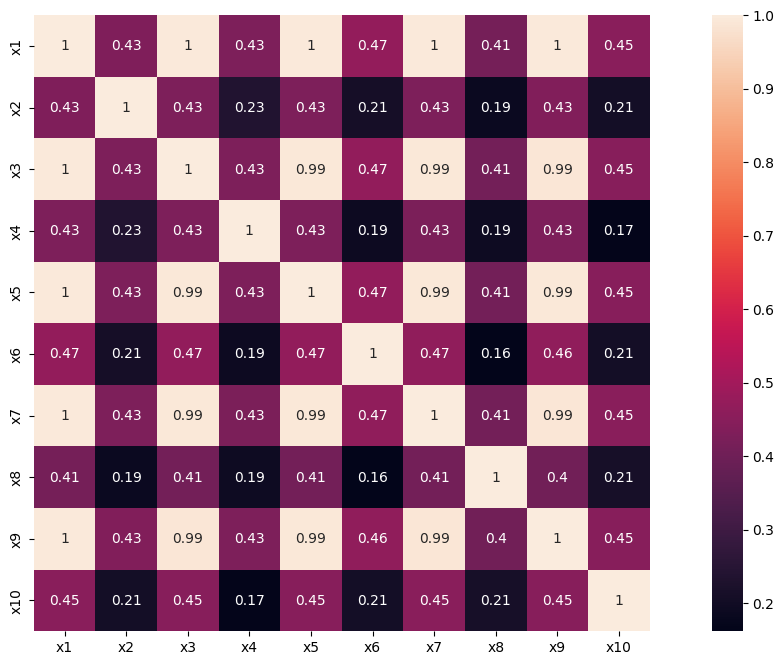

In [45]:
import seaborn as sns

corr = multi_coll_data.drop(columns = ['y']).corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, square=True, annot=True)

### Изучение зависимых и независимых переменных

### Понимание масштабирования и нормализации данных

### Задание 9.1 - Разбиение, масштабирование и моделирование данных

### Резюме

## 10 Моделирование данных - основы моделирования

### Введение в моделирование данных

### Изучение основ моделирования

### Прогнозирование будущих значений временных рядов

### Задание 10.1 - Нормализация и сглаживание данных

### Резюме

## 11 Моделирование данных - Регрессионное моделирование

### Введение в регрессионное моделирование

### Изучение регрессионного моделирования

### Диагностика модели

### Задание 11.1 - Множественная регрессия с нелинейными моделями

### Резюме